In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import r2_score , classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
print(df.isna().sum())

text    0
spam    0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


array([[<Axes: title={'center': 'spam'}>]], dtype=object)

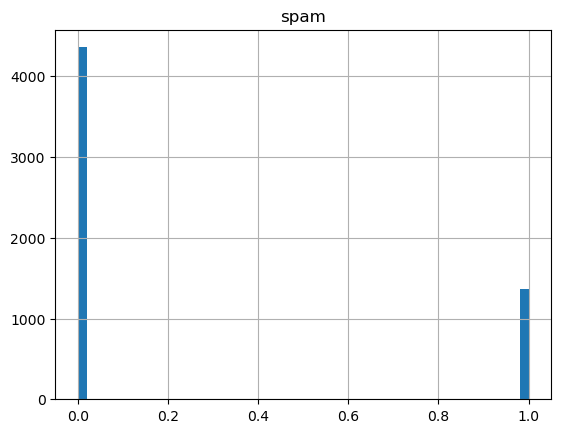

In [7]:
df.hist(bins=50)

<Axes: xlabel='spam', ylabel='count'>

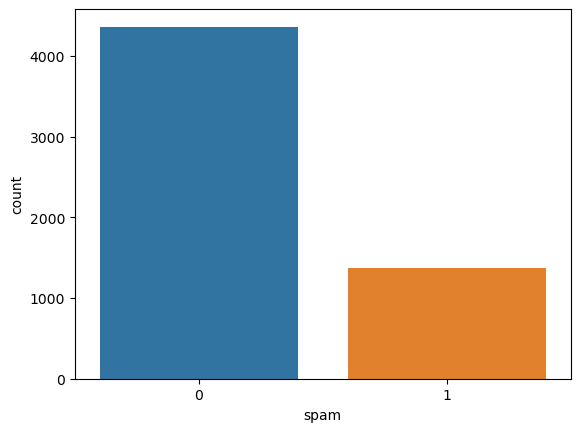

In [8]:
sns.countplot(x='spam',data = df)

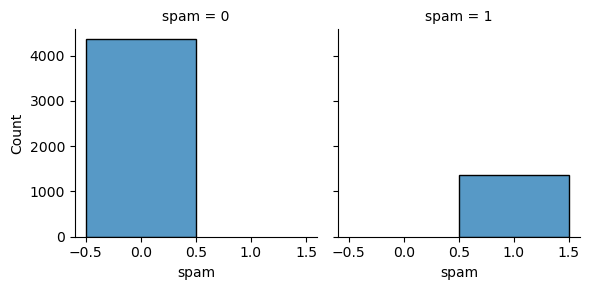

In [9]:
g = sns.FacetGrid(df, col="spam")
g.map(sns.histplot, "spam")

C:\Users\lab1\AppData\Local\Temp\ipykernel_9556\4249105055.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm',square=True)


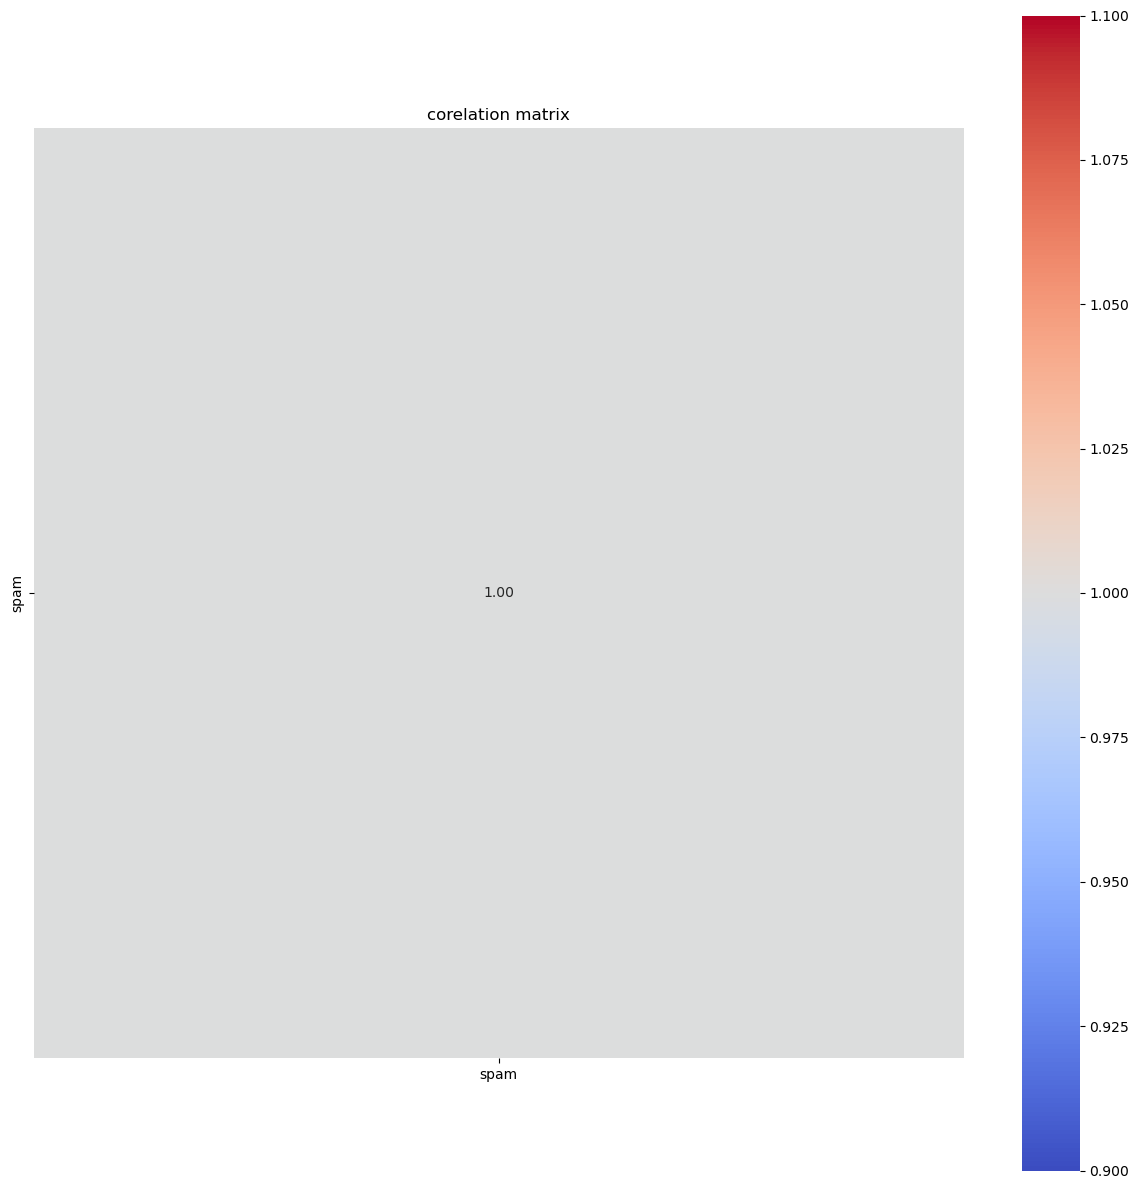

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm',square=True)
plt.title("corelation matrix")
plt.show()

In [11]:
vectorizer = CountVectorizer()

In [12]:
x=vectorizer.fit_transform(df['text'])

In [24]:
y=df['spam']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=None)

In [15]:
clf = MultinomialNB()

In [16]:
clf.fit(X_train, y_train)

MultinomialNB()

In [30]:
y_pred=clf.predict(X_test)

In [31]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1333
           1       0.96      0.99      0.98       386

    accuracy                           0.99      1719
   macro avg       0.98      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719

